In [2]:
# Omar Al-Naimi
#This notebook is for developing logistic regression model for
#predicting patients' readmission within 30 days after discharge.

In [1]:
# importing data set = Hospital-Readmission.csv
import pandas as pd
my_dataset = pd.read_csv ('C:\\Users\\omar_\\Desktop\\Springboard DataScience\\Capstone Project\\my 1st project\\project progress\\Data_SecondarySource\\Hospital-Readmission.csv')

In [2]:
#checking my_dataset. it is 10,000 rows and 14 columns
my_dataset

,RowNumber,PatientInsuranceNO.,Surname,SES-CreditScore,HospitalLocation,Gender,Age,AdmisionPeriod/day,PreviousExpenses,NumOfPrevious admissions,HealthInsurance,RegularCheckup,EstimatedExpenses,Readmited
0,1,15634602,Hargrave,619,Manhattan,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,StatenIsland,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Manhattan,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Manhattan,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,StatenIsland,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,StatenIsland,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,Manhattan,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Bronx,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,Manhattan,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,Manhattan,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# More checking about data set
rows= len (my_dataset)
columns= len (my_dataset.columns)
print (my_dataset.columns)
print ("Total Rows =", rows, " : Total Columns =", columns)

Index(['RowNumber', 'PatientInsuranceNO.', 'Surname', 'SES-CreditScore',
       'HospitalLocation', 'Gender', 'Age', 'AdmisionPeriod/day',
       'PreviousExpenses', 'NumOfPrevious admissions', 'HealthInsurance',
       'RegularCheckup', 'EstimatedExpenses', 'Readmited'],
      dtype='object')
Total Rows = 10000  : Total Columns = 14


In [4]:
#columns information shows correct data types, numbers, and non-null
my_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber                   10000 non-null int64
PatientInsuranceNO.         10000 non-null int64
Surname                     10000 non-null object
SES-CreditScore             10000 non-null int64
HospitalLocation            10000 non-null object
Gender                      10000 non-null object
Age                         10000 non-null int64
AdmisionPeriod/day          10000 non-null int64
PreviousExpenses            10000 non-null float64
NumOfPrevious admissions    10000 non-null int64
HealthInsurance             10000 non-null int64
RegularCheckup              10000 non-null int64
EstimatedExpenses           10000 non-null float64
Readmited                   10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


---

In [5]:
# Data description (descriptive statistics) for important numerical columns
# subsetting columns
columns_subset= my_dataset [['Age','SES-CreditScore', 'AdmisionPeriod/day', 'PreviousExpenses', 'NumOfPrevious admissions', \
             'EstimatedExpenses']]
columns_subset.describe ().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
SES-CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
AdmisionPeriod/day,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
PreviousExpenses,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfPrevious admissions,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedExpenses,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


---

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams ['figure.figsize'] =8,4
import warnings
warnings.filterwarnings ('ignore')
plt.style.use ("ggplot")

In [7]:
from collections import Counter

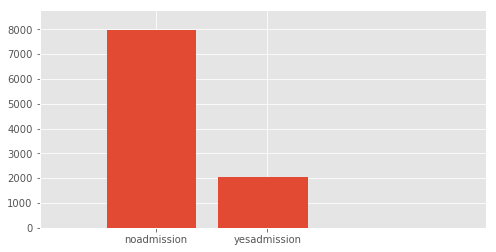

In [8]:
#First graph is for general comparison between the number of readmitted vs not readmitted

admission = my_dataset.Readmited
c = Counter (admission)
noadmission = c[0]
yesadmission = c[1]


bar_heights = (noadmission, yesadmission)
x = (1, 2)

fig, ax = plt.subplots()
width = 0.8

ax.bar(x, bar_heights, width)

ax.set_xlim((0, 4))
ax.set_ylim((0, max(noadmission, yesadmission)*1.1))

ax.set_xticks([i+width/20 for i in x])
ax.set_xticklabels(['noadmission', 'yesadmission'])

plt.show()

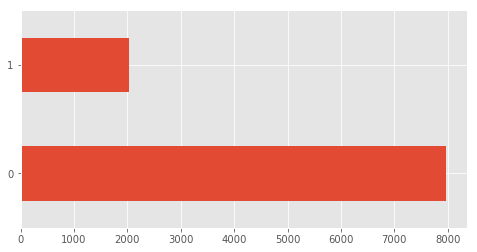

In [9]:
my_dataset["Readmited"].value_counts().plot(kind = "barh")

In [19]:
male = my_dataset ['Gender'] =='Male'
female = my_dataset ['Gender'] =='Female'
admitted = my_dataset ['Readmited'] == 1
not_admitted = my_dataset ['Readmited'] == 0

male_admitted = my_dataset [male & admitted]
male_not_admitted = my_dataset [male & not_admitted]
female_admitted = my_dataset [female & admitted]
female_not_admitted = my_dataset [female & not_admitted]

type (male_admitted)

pandas.core.frame.DataFrame

In [41]:
vis1 = male_admitted ['Gender'].value_counts()
vis2 = male_not_admitted ['Gender'].value_counts()
vis3 = female_admitted ['Gender'].value_counts()
vis4 = female_not_admitted ['Gender'].value_counts()

vis = pd.DataFrame (columns = [vis1, vis2, vis3, vis4])
type(vis)
vis

firstdic = {'MA': vis1, 'MNA': vis2, 'FA': vis3, 'FNA': vis4}

firstset = pd.DataFrame (firstdic)


firstset


,FA,FNA,MA,MNA
Female,1139.0,3404.0,NaN,NaN
Male,NaN,NaN,898.0,4559.0


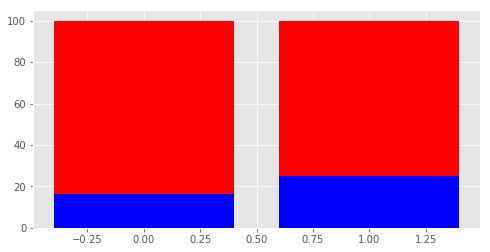

In [52]:
import matplotlib.pyplot as plt
pool1 = vis1+vis2
vis1p = vis1 *100/pool1
vis2p = vis2*100/pool1
pool2 = vis3 +vis4
vis3p = vis3*100/pool2
vis4p = vis4*100/pool2
A = [vis1p, vis3p]
B = [vis2p, vis4p]

X = range(2)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.show()

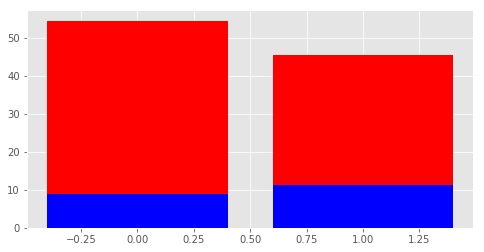

In [50]:
import matplotlib.pyplot as plt
pool = 898 + 1139 + 4559 + 3404
A = [898/pool*100, 1139/pool*100]
B = [4559/pool*100, 3404/pool*100]

X = range(2)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.show()

In [1]:
import matplotlib.pyplot as plt

A = [vis1, vis3]
B = [vis2, vis4]

X = range(2)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.show()

NameError: name 'vis1' is not defined

In [2]:
# Initialize a Figure 
fig = plt.figure(figsize = (15,8), edgecolor= 'yellow', facecolor= 'yellow')

# Add Axes to the Figure
fig.add_axes()

#decide how many fig do you want to Initialize the number of plots
ax1 = fig.add_subplot(1,5,1)  # for total and subtotal numbers
ax2 = fig.add_subplot(1,5,3)  # for subtotal percentage
ax3 = fig.add_subplot(1,5,5)  # for 

#add legend
import matplotlib.patches as mpatches
blue_patch1 = mpatches.Patch(color='blue', label='Gender Number')
ax1.legend(handles=[blue_patch1])
blue_patch2 = mpatches.Patch(color='blue', label='Gender Percentage')
ax2.legend(handles=[blue_patch2])

# Plot the data
from collections import Counter

c = Counter(my_dataset.Gender)

total = c['Male'] + c['Female']
men = c['Male']
women = c['Female']
bar_heights = (total, men, women)
ax.set_xlim((0, 3))
ax.set_ylim((0, max(total, men, women)*1.1))
x = (1, 2, 3)
ax1.bar(x, bar_heights, width = 0.5)
ax1.set_xticks([i+width/20 for i in x])
ax1.set_xticklabels(['Total','Male', 'Female'])

c = Counter(my_dataset.Gender)
total2 = (c['Male'] + c['Female'])/100
men2 = c['Male']/100
women2 = c['Female']/100
bar_heights = (men2, women2)
ax.set_xlim((0, 3))
ax.set_ylim((0, max(men2, women2)*1.1))
x = (1, 2)
ax2.bar(x, bar_heights, width = 0.5)
ax2.set_xticks([i+width/20 for i in x])
ax2.set_xticklabels(['Male','Female'])
ax2.set_ylabel ("%")

#different functions
#ax3.violinplot (my_dataset.Age)
#fig.delaxes (ax3)

plt.show()

NameError: name 'my_dataset' is not defined

In [14]:
import matplotlib.pyplot as plt
plt.bar(X, my_dataset.Gender, color = 'b')
plt.bar(X, my_dataset.Readmited, color = 'r')
plt.show()







NameError: name 'X' is not defined

In [ ]:
plt.style.use ("ggplot")
from collections import Counter

c = Counter(my_dataset.Gender)

men = c['Male']
women = c['Female']

bar_heights = (men, women)
x = (1, 2)

fig, ax = plt.subplots()
width = 0.8

ax.bar(x, bar_heights, width)

ax.set_xlim((0, 3))
ax.set_ylim((0, max(men, women)*1.1))

ax.set_xticks([i+width/20 for i in x])
ax.set_xticklabels(['Male', 'Female'])

plt.show()

In [ ]:
gender = my_dataset.Gender
admission = my_dataset.Readmited
plt.style.use ("ggplot")
from collections import Counter

c1 = Counter(gender)
c2 = Counter (admission)

men = c1['Male']
women = c1['Female']
noadmission = c2[0]
yesadmission = c2[1]


bar_heights = (men, women, noadmission, yesadmission)
x = (1, 2, 3, 4)

fig, ax = plt.subplots()
width = 0.5

ax.bar(x, bar_heights, width)

ax.set_xlim((0, 6))
ax.set_ylim((0, max(men, women, noadmission, yesadmission)*1.1))

ax.set_xticks([i+width/20 for i in x])
ax.set_xticklabels(['Male', 'Female', 'noadmission', 'yesadmission'])

plt.show()

In [ ]:
# Visualization of data set
# 1) convert panda data frame or numpy matrix into array and assigne it to my_dataset_array for better visualization.

#my_dataset_array = my_dataset.values
#type (my_dataset_array)

# 2) import the required libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams ['figure.figsize'] =8,4  # this vis size is applied to all comming visualizations

# 3) Remove warning sign that might happen.
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x =  np.linspace(10,25,5)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Initialize a Figure 
fig = plt.figure(figsize = (15,8), edgecolor= 'yellow', facecolor= 'yellow')

# Add Axes to the Figure
fig.add_axes()

#decide how many fig do you want to Initialize the number of plots
ax1 = fig.add_subplot(1,5,1)  # for total and subtotal numbers
ax2 = fig.add_subplot(1,5,3)  # for subtotal percentage
ax3 = fig.add_subplot(1,5,5)  # for 

#add legend
import matplotlib.patches as mpatches
blue_patch1 = mpatches.Patch(color='blue', label='Gender Number')
ax1.legend(handles=[blue_patch1])
blue_patch2 = mpatches.Patch(color='blue', label='Gender Percentage')
ax2.legend(handles=[blue_patch2])

# Plot the data
from collections import Counter

c = Counter(my_dataset.Gender)

total = c['Male'] + c['Female']
men = c['Male']
women = c['Female']
bar_heights = (total, men, women)
ax.set_xlim((0, 3))
ax.set_ylim((0, max(total, men, women)*1.1))
x = (1, 2, 3)
ax1.bar(x, bar_heights, width = 0.5)
ax1.set_xticks([i+width/20 for i in x])
ax1.set_xticklabels(['Total','Male', 'Female'])

c = Counter(my_dataset.Gender)
total2 = (c['Male'] + c['Female'])/100
men2 = c['Male']/100
women2 = c['Female']/100
bar_heights = (men2, women2)
ax.set_xlim((0, 3))
ax.set_ylim((0, max(men2, women2)*1.1))
x = (1, 2)
ax2.bar(x, bar_heights, width = 0.5)
ax2.set_xticks([i+width/20 for i in x])
ax2.set_xticklabels(['Male','Female'])
ax2.set_ylabel ("%")

#different functions
#ax3.violinplot (my_dataset.Age)
#fig.delaxes (ax3)

plt.show()

In [ ]:

vis1 = sns.distplot (my_dataset ['Age'], bins = 10)


In [ ]:
vis2 = sns.boxplot (data = my_dataset, x= 'Gender', y= 'SES-CreditScore')

In [ ]:
vis3 = sns.boxplot (data = my_dataset, x= 'HospitalLocation')

In [ ]:
import pandas as pd
import numpy as np
my_dataset = pd.read_csv ('C:\\Users\\omar_\\Desktop\\Springboard DataScience\\Capstone Project\\my 1st project\\project progress\\Data_SecondarySource\\Hospital-Readmission.csv')

import matplotlib.pyplot as plt
# red dashes, blue squares and green triangles
plt.plot(my_dataset.Age, my_dataset.Age, 'r--')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [ ]:
x = [10,9,8,7,6,5,4,3,2,1]
y=[10, 20,30,40,50,60,70,80,90,100] 
z = [5,10,15,20,25,30,35,40,45,50]

plt.figure ('charts')
plt.subplot(231)
plt.plot(x, y)
plt.subplot (232)
plt.plot (y, x)
plt.subplot (236)
plt.bar (z, y)
plt.subplot (235)
plt.bar (x, z, bottom=z, color= 'r')
plt.show ('charts')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
g = 10
h = 10.0
g is h


In [ ]:
x = 7
y = x
x = 3
print(x,", ",y)

In [ ]:
i = 2
while i < 12:
    print (i)
    i+= 3

In [ ]:
i = 0
while i < 10:
	print(i)
	i+=1

In [ ]:
def my_abs(val):
    if val < 0:
        return 0-val
    return val

In [ ]:
def swap(val1, val2):
	tmp = val1
	val1 = val2
	val2 = tmp

x = 6
y = 3
swap(x, y)
print(x,", ",y)

In [ ]:
import pandas as pd
pd.__version__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(3)

a = [3,6,9]
b = [2,7,1]
c = [0,3,1]
d = [4,0,3]

p1 = plt.bar(ind, a, 1, color='#ff3333')
p2 = plt.bar(ind, b, 1, color='#33ff33', bottom=a)
p3 = plt.bar(ind, c, 1, color='#3333ff', bottom=[a[j] +b[j] for j in range(len(a))])
p4 = plt.bar(ind, d, 1, color='#33ffff', bottom=[a[j] +b[j] +c[j] for j in range(len(a))])

plt.show()

In [ ]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

NameError: name 'df' is not defined

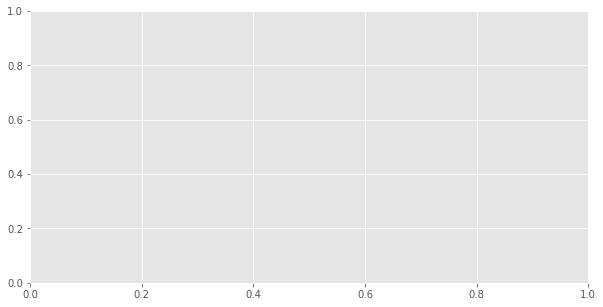

In [15]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df['pre_score']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        df['pre_score'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Pre Score',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F4561D')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the mid_score data
        df['mid_score'],
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=df['pre_score'],
        # with the label mid score
        label='Mid Score',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1911E')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['post_score'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['pre_score'],df['mid_score'])],
        # with the label post score
        label='Post Score',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F1BD1A')

# set the x ticks with names
plt.xticks(tick_pos, df['first_name'])

# Set the label and legends
ax1.set_ylabel("Total Score")
ax1.set_xlabel("Test Subject")
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
